# Computer Vision Projects Notebook

## Project 1: Grayscale Analysis & Motion Detection

### 1.1 Overview

In this project, we convert surveillance camera images to grayscale and analyze them for motion detection and light source identification.

### 1.2 Objectives

- Convert color image to grayscale
- Compare original vs grayscale representation
- Evaluate grayscale effectiveness for motion detection
- Detect the brightest pixel to locate light sources

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 1.3 Code: Comparison - Original vs Grayscale

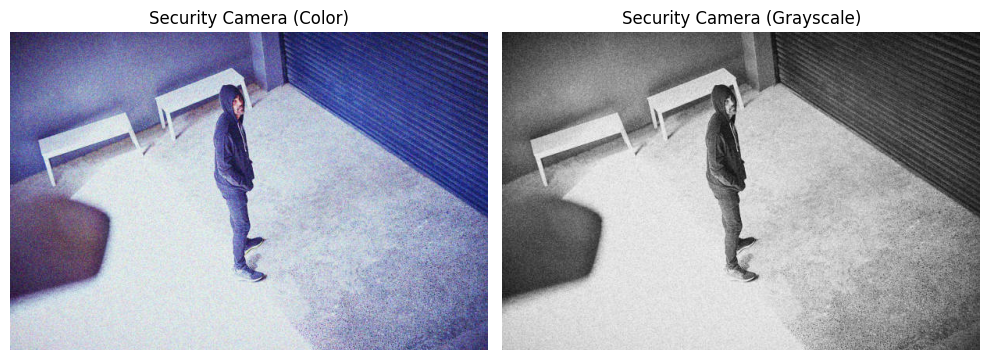

In [2]:
# 1) Read and convert to RGB (for correct display in Matplotlib)
image = cv2.imread('./images/security-camera.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 2) Make a grayscale version
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# 3) Show both side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Left: color image
axes[0].imshow(image)
axes[0].set_title('Security Camera (Color)')
axes[0].axis('off')

# Right: grayscale image (use cmap='gray'!)
axes[1].imshow(gray_image, cmap='gray')
axes[1].set_title('Security Camera (Grayscale)')
axes[1].axis('off')

plt.tight_layout()
plt.show()


### 1.4 Analysis: Is Grayscale Better for Motion Detection?

**Answer: YES - Grayscale is better for motion detection**

**Why?**

- **Reduces computation**: Only 1 channel instead of 3 (RGB)
- **Avoids color noise**: Movement shows up as brightness changes, not color changes
- **Better for surveillance**: Color isn't critical for detecting motion; intensity is
- **Faster processing**: Less data to process means faster detection

Motion detection methods (frame differencing, background subtraction) look for **changes in brightness** between frames. Grayscale captures this directly.

### 1.5 Code: Finding the Brightest Pixel

In [3]:
# Maximum intensity value
max_val = np.max(gray_image)

# Position of the brightest pixel
max_pos = np.unravel_index(np.argmax(gray_image), gray_image.shape)

print(f"Brightest pixel value: {max_val}")
print(f"Location (row, col): {max_pos}")


Brightest pixel value: 254
Location (row, col): (np.int64(137), np.int64(117))


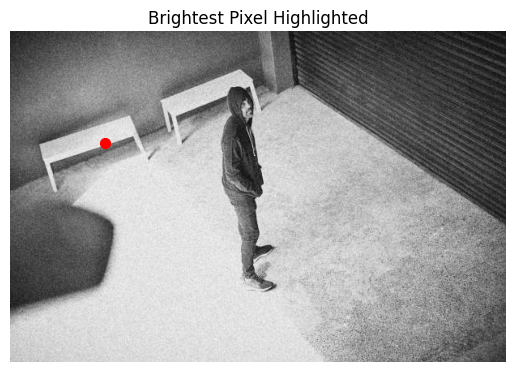

In [4]:

# Visualize the brightest pixel
plt.imshow(gray_image, cmap='gray')
plt.scatter([max_pos[1]], [max_pos[0]], c='red', s=50, marker='o')  # mark brightest pixel
plt.title('Brightest Pixel Highlighted')
plt.axis('off')
plt.show()


### 1.6 Results

- **Brightest pixel value**: 254 (almost maximum 255)
- **Location**: Row 137, Column 117
- **Interpretation**: This location marks a light source in the surveillance area

## Project 2: Traffic Light Detection using Color Spaces

### 2.1 Overview

In this project, we detect which traffic light is active (red, orange, or green) by converting to HSV color space and creating color masks.

### 2.2 Objectives

- Convert color image to HSV color space
- Create masks for red, orange, and green lights
- Automatically detect which light is currently ON

### 2.3 Why HSV Instead of BGR/RGB?

**The Problem with BGR/RGB:**

- Colors are mixed together (R, G, B channels)
- Same color at different brightness levels = different values
- Hard to detect specific colors reliably

**The Solution - HSV:**

- **H (Hue)**: The actual color (0-180 in OpenCV)
- **S (Saturation)**: Color purity
- **V (Value)**: Brightness

A red light stays in the same **Hue range** (0-10) regardless of how bright or dim it is. This makes color detection much more reliable!


### 2.4 Code: Convert to HSV and Display

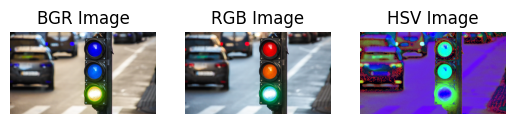

In [5]:
# Load image
bgr_image = cv2.imread('./images/traffic-light.jpg')
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)

# Display all three color spaces
plt.subplot(1, 3, 1)
plt.imshow(bgr_image)
plt.title("BGR Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(rgb_image)
plt.title("RGB Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(hsv_image)
plt.title("HSV Image")
plt.axis("off")

plt.show()

### 2.5 Code: Create Color Masks

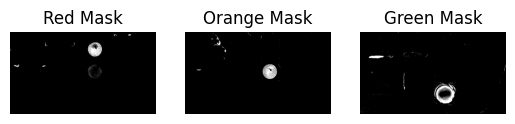

In [6]:
# Define HSV ranges for each color
lower_red = np.array([0, 120, 100])
upper_red = np.array([5, 255, 255])

lower_orange = np.array([8, 120, 100])
upper_orange = np.array([20, 255, 255])

lower_green = np.array([40, 80, 100])
upper_green = np.array([100, 255, 255])

# Create masks using inRange()
# If pixel HSV is between lower and upper bounds → WHITE (255)
# Otherwise → BLACK (0)
mask_red = cv2.inRange(hsv_image, lower_red, upper_red)
mask_orange = cv2.inRange(hsv_image, lower_orange, upper_orange)
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)

# Display all masks
plt.subplot(1, 3, 1)
plt.imshow(mask_red, cmap='gray')
plt.title("Red Mask")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(mask_orange, cmap='gray')
plt.title("Orange Mask")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(mask_green, cmap='gray')
plt.title("Green Mask")
plt.axis("off")

plt.show()

### 2.6 Code: Detect Which Light is ON

In [7]:
# Count white pixels in each mask
# cv2.countNonZero() counts all pixels that are NOT 0 (i.e., white pixels)
count_red = cv2.countNonZero(mask_red)
count_orange = cv2.countNonZero(mask_orange)
count_green = cv2.countNonZero(mask_green)

print(f"Red pixels: {count_red}")
print(f"Orange pixels: {count_orange}")
print(f"Green pixels: {count_green}")

# Find which light has the most white pixels
if count_red > count_orange and count_red > count_green:
    light_on = "RED"
elif count_orange > count_red and count_orange > count_green:
    light_on = "ORANGE"
elif count_green > count_red and count_green > count_orange:
    light_on = "GREEN"
else:
    light_on = "UNKNOWN"

print(f"\n🚦 Light Detected: {light_on}")

Red pixels: 9268
Orange pixels: 9837
Green pixels: 14999

🚦 Light Detected: GREEN


## Project 3: Drawing on Images - Football Match

### 3.1 Overview
In this project, we learn how to draw shapes, arrows, and text on images using OpenCV. We'll work with a football match image to annotate the ball location and shot information.

### 3.2 Objectives
- Draw rectangles around objects (the ball)
- Draw arrows indicating direction (shot direction)
- Add text annotations with information (shot speed)
- Understand OpenCV drawing functions

### 3.3 Step 1: Load and Display the Image

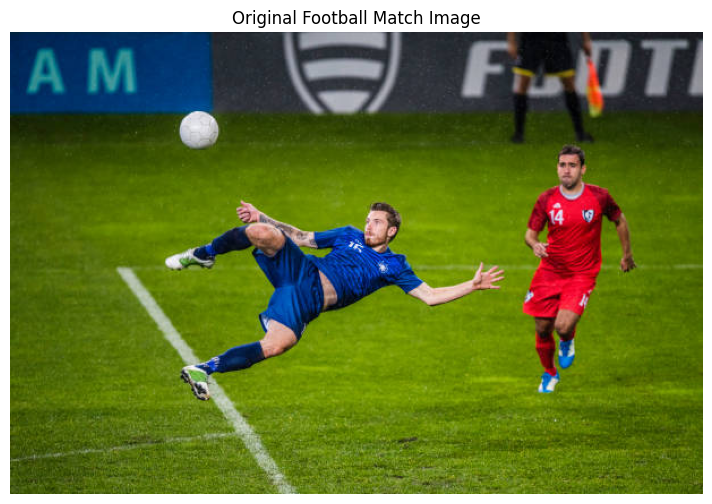

In [8]:
# Load the football match image
football_match_bgr= cv2.imread('./images/football-match.jpg')
football_match_rgb = cv2.cvtColor(football_match_bgr, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(10, 6))
plt.imshow(football_match_rgb)
plt.title("Original Football Match Image")
plt.axis("off")
plt.show()

### 3.4 Step 2: Draw a Rectangle Around the Ball

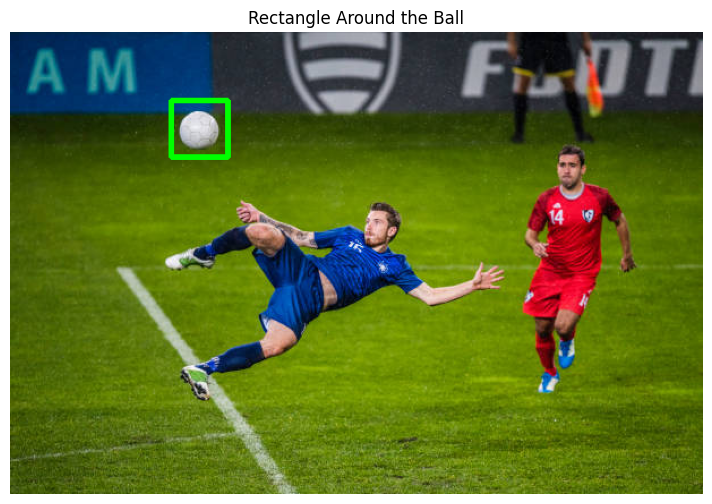

In [9]:
x, y, w, h = 142, 60, 50, 50 
cv2.rectangle(football_match_rgb, (x, y), (x + w, y + h), (0, 255, 0), 3)
plt.figure(figsize=(10, 6))
plt.imshow(football_match_rgb)
plt.title("Rectangle Around the Ball")
plt.axis("off")
plt.show()

### 3.5 Step 3: Draw an Arrow Indicating Shot Direction

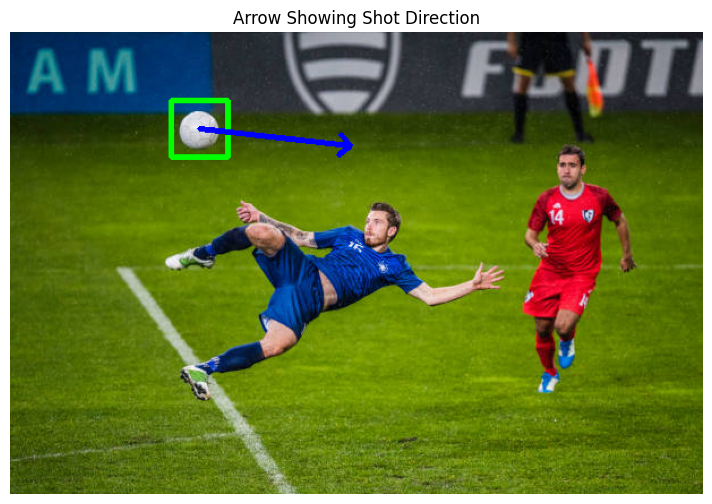

In [10]:
# Ball center (approximate)
start_point = (x + w//2, y + h//2)

# Arrow endpoint (direction of the shot)
end_point = (300, 100)

# Draw arrow
cv2.arrowedLine(football_match_rgb, start_point, end_point, (0, 0, 255), 3)

# Display
plt.figure(figsize=(10, 6))
plt.imshow(football_match_rgb)
plt.title("Arrow Showing Shot Direction")
plt.axis("off")
plt.show()

### 3.6 Step 4: Add Text Annotation

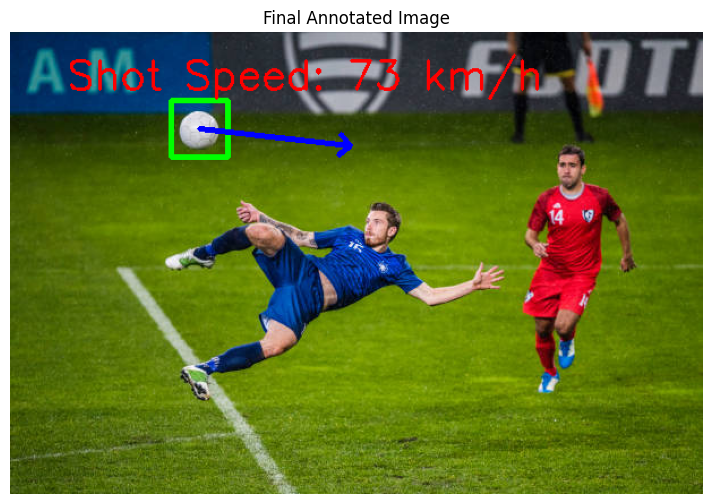

In [11]:
text = "Shot Speed: 73 km/h"
text_position = (50, 50) 
cv2.putText(football_match_rgb, text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 0, 0), 2)

# Display
plt.figure(figsize=(10, 6))
plt.imshow(football_match_rgb)
plt.title("Final Annotated Image")
plt.axis("off")
plt.show()

## Project 4: Image Transformations (Translation + Rotation)

### 4.1 Overview

In this project, we learn how to apply geometric transformations to images using OpenCV. We'll work with a tilted photo to estimate the tilt angle and rotate it to straighten the scene.

### 4.2 Objectives

- Understand image rotation and translation
- Estimate the tilt angle of an image
- Apply inverse rotation to straighten the scene
- Compare before and after transformations

### 4.3 Step 1: Load and Display the Tilted Image

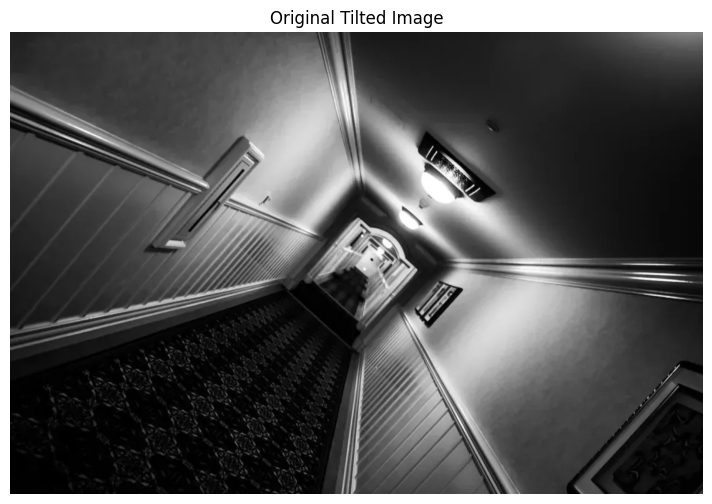

Image dimensions: 1110x740


In [12]:
image = cv2.imread('./images/tilted-photo.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get image dimensions
height, width = image_rgb.shape[:2]

# Display the original tilted image
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title("Original Tilted Image")
plt.axis("off")
plt.show()

print(f"Image dimensions: {width}x{height}")

### 4.4 Step 2: Estimate the Tilt Angle

In [13]:
estimated_angle = 42
print(f"Estimated tilt angle: {estimated_angle}°")

Estimated tilt angle: 42°


### 4.5 Step 3: Apply Rotation to Straighten the Image

Rotation matrix : 
[[   0.74314483    0.66913061 -105.02370249]
 [  -0.66913061    0.74314483  466.4039011 ]]


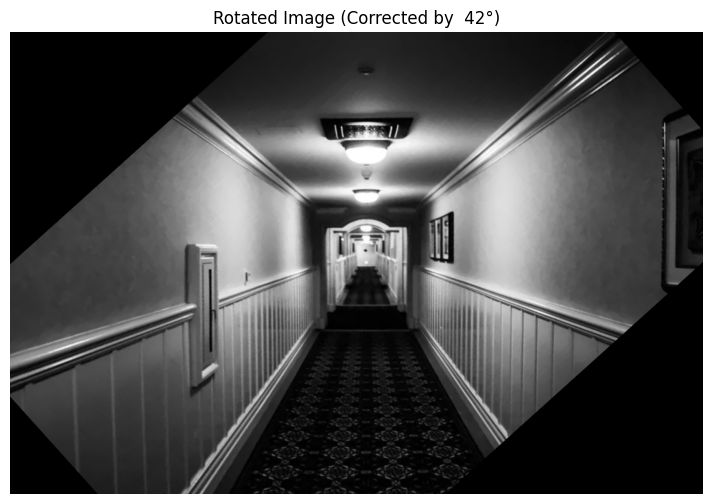

In [14]:
# Calculate the center of the image
center = (width // 2, height // 2)
# Get rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, estimated_angle, 1.0)

print(f"Rotation matrix : \n{rotation_matrix}")

# Apply rotation
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (width, height))

# Display the rotated image
plt.figure(figsize=(10, 6))
plt.imshow(rotated_image)
plt.title(f"Rotated Image (Corrected by  {estimated_angle}°)")
plt.axis("off")
plt.show()

### 4.6 Step 4: Compare Before and After

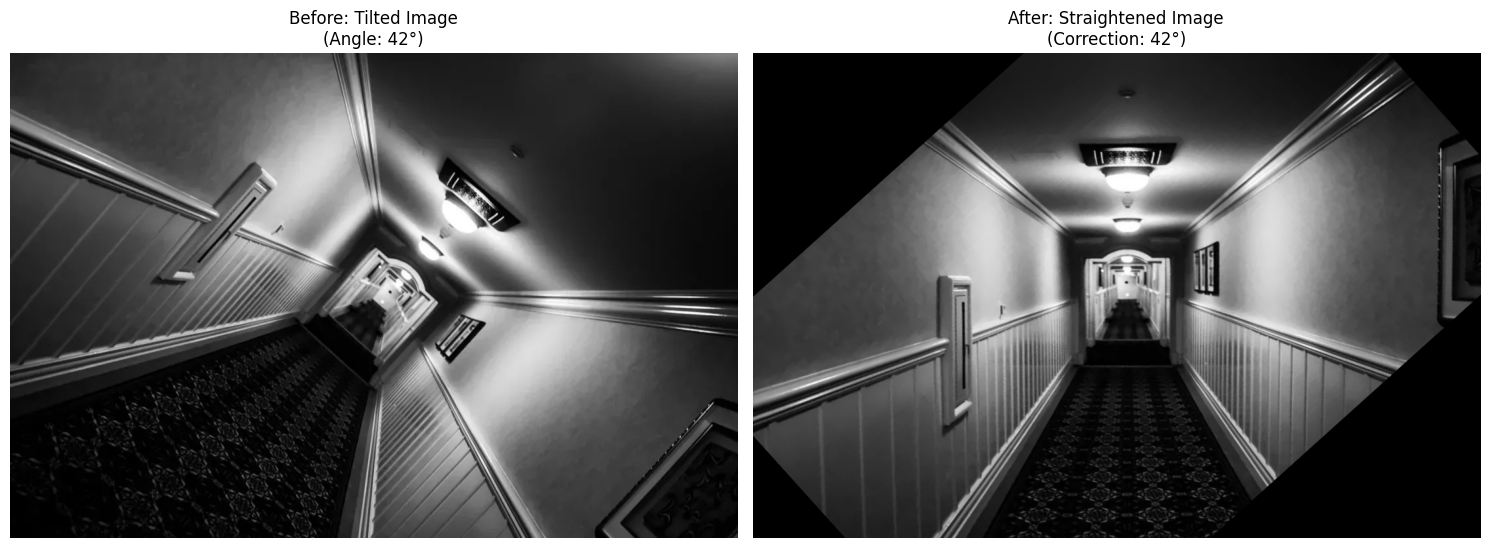

In [15]:
# Create side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Before: Original tilted image
ax1.imshow(image_rgb)
ax1.set_title(f"Before: Tilted Image\n(Angle: {estimated_angle}°)")
ax1.axis("off")

# After: Straightened image
ax2.imshow(rotated_image)
ax2.set_title(f"After: Straightened Image\n(Correction: {estimated_angle}°)")
ax2.axis("off")

plt.tight_layout()
plt.show()

## Project 5: Resizing, Interpolation, and Cropping **(E-commerce Product Image Preparation)**

---

### 5.1 Overview

In this project, we prepare a **product image** for use on an **e-commerce website**.  
E-commerce platforms usually require images to have:
- Standard dimensions
- A square aspect ratio
- High visual quality at different resolutions

We will:
- Resize an image to **512 × 512**
- Crop the image to **center the product** in a perfect square
- Create a **thumbnail (128 × 128)**
- Compare **different interpolation methods**

### 5.2 Step 1: Load and Display the Product Image

Original size: 900 x 900


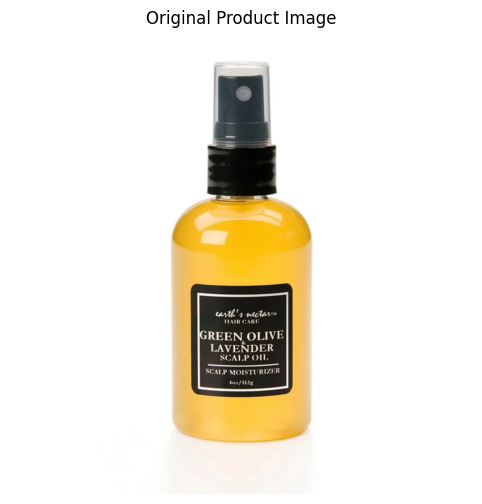

In [16]:
# Load product image
image = cv2.imread("./images/product.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get original dimensions
height, width = image_rgb.shape[:2]

# Display original image
plt.figure(figsize=(8, 6))
plt.title("Original Product Image")
plt.axis("off")
plt.imshow(image_rgb)


print(f"Original size: {width} x {height}")

### 5.3 Step 2: Resize Image to 512 × 512

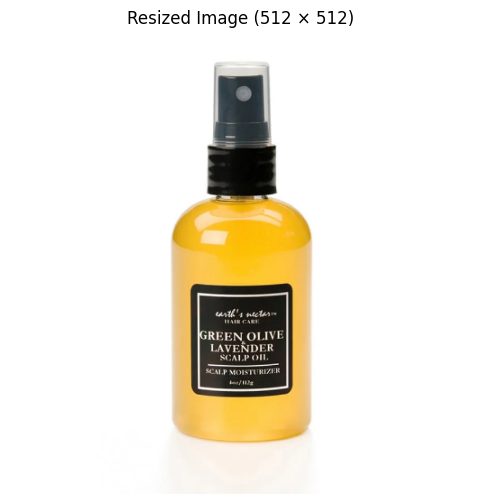

In [17]:
resized_512 = cv2.resize(image_rgb, (512, 512), interpolation=cv2.INTER_LINEAR)
plt.figure(figsize=(6, 6))
plt.title("Resized Image (512 × 512)")
plt.axis("off")
plt.imshow(resized_512)

### 5.3 Step 3: Center Crop to a Perfect Square

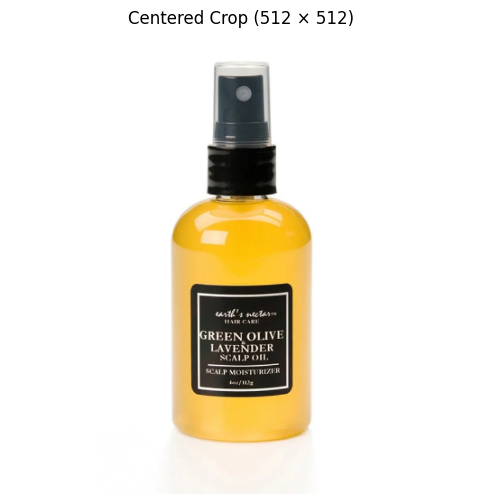

In [18]:
# Find the shortest side
min_side = min(height, width)

# Compute image center
center_x = width // 2
center_y = height // 2

# Compute crop coordinates
start_x = center_x - min_side // 2
start_y = center_y - min_side // 2

# Perform center crop
cropped_square = image_rgb[
    start_y:start_y + min_side,
    start_x:start_x + min_side
]
cropped_resized_512 = cv2.resize(cropped_square, (512, 512))

plt.figure(figsize=(6, 6))
plt.imshow(cropped_resized_512)
plt.title("Centered Crop (512 × 512)")
plt.axis("off")
plt.show()


### 5.4 Step 4: Create a Thumbnail (128 × 128)

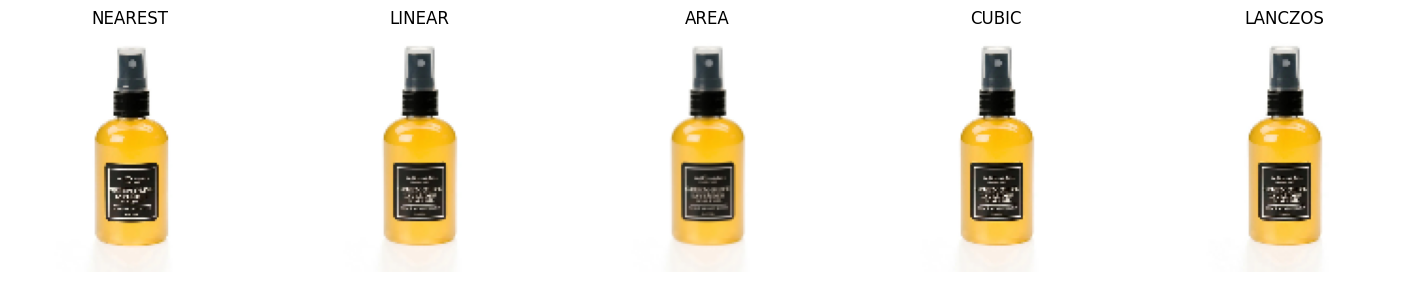

In [19]:
interpolations = {
    "NEAREST": cv2.INTER_NEAREST,
    "LINEAR": cv2.INTER_LINEAR,
    "AREA": cv2.INTER_AREA,
    "CUBIC": cv2.INTER_CUBIC,
    "LANCZOS": cv2.INTER_LANCZOS4
}

fig, axes = plt.subplots(1, 5, figsize=(18, 4))

for ax, (name, method) in zip(axes, interpolations.items()):
    thumb = cv2.resize(
        cropped_resized_512,
        (128, 128),
        interpolation=method
    )
    ax.set_title(name)
    ax.axis("off")
    ax.imshow(thumb)



## Project 6: Image Processing Tools (Thresholding & Histograms)

---

### 6.1 Overview
In this project, we analyze a low-contrast satellite image showing water bodies and clouds. We'll use histogram analysis, histogram equalization, and automatic thresholding to enhance contrast and segment different regions.

### 6.2 Objectives

- Analyze the initial histogram to understand pixel value distribution
- Apply histogram equalization to improve contrast
- Use Otsu's automatic thresholding to separate clouds from water/land
- Compare before and after results
  
### 6.3 Step 1: Load and Display the Satellite Image

Image dimensions: 1800 x 1400
Min pixel value: 0
Max pixel value: 255


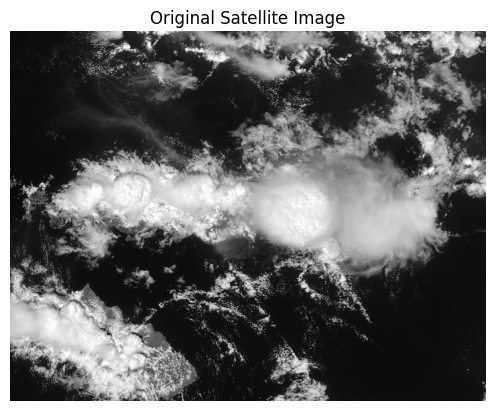

In [24]:
# Load the satellite image
image = cv2.imread("./images/satellite-image.jpg",cv2.IMREAD_GRAYSCALE)

# Display Images
plt.title("Original Satellite Image")
plt.axis("off")
plt.imshow(image, cmap="gray")

# Get image dimensions
height, width = image.shape
print(f"Image dimensions: {width} x {height}")
print(f"Min pixel value: {image.min()}")
print(f"Max pixel value: {image.max()}")

### 6.4 Step 2: Analyze the Initial Histogram

C:\Users\hp\AppData\Local\Temp\ipykernel_14368\2012214198.py:3: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(image.ravel(),256,[0,256])



📊 Histogram Analysis:
Occupied pixel range: 4 - 254
Range used: 250 out of 255 possible values
Percentage of full range: 98.0%


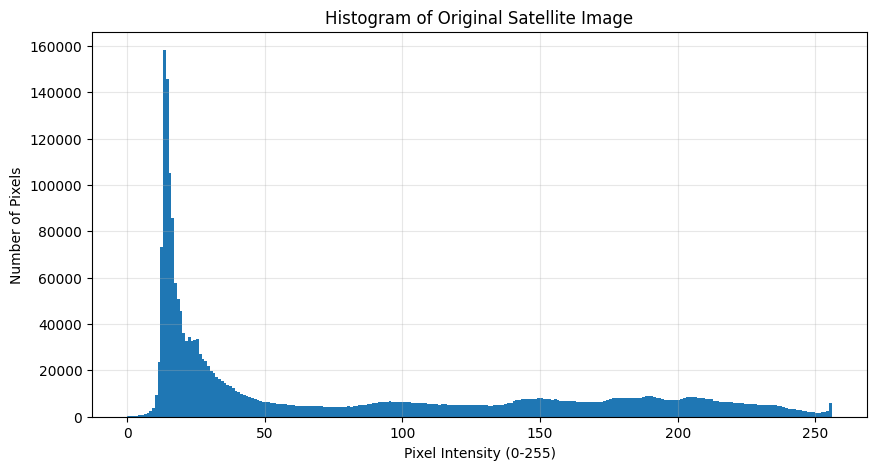

In [28]:
# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(image.ravel(),256,[0,256])
plt.title("Histogram of Original Satellite Image")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Number of Pixels")
plt.grid(True, alpha=0.3)

# Analyze pixel value range
min_pixel = gray_image.min()
max_pixel = gray_image.max()

print(f"\n📊 Histogram Analysis:")
print(f"Occupied pixel range: {min_pixel} - {max_pixel}")
print(f"Range used: {max_pixel - min_pixel} out of 255 possible values")
print(f"Percentage of full range: {((max_pixel - min_pixel) / 255 * 100):.1f}%")

### 6.5 Step 3: Apply Histogram Equalization

#### Method 1 : LookUp Table (LUT)

C:\Users\hp\AppData\Local\Temp\ipykernel_14368\2742111232.py:34: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(transformed.ravel(), 256, [0,256])


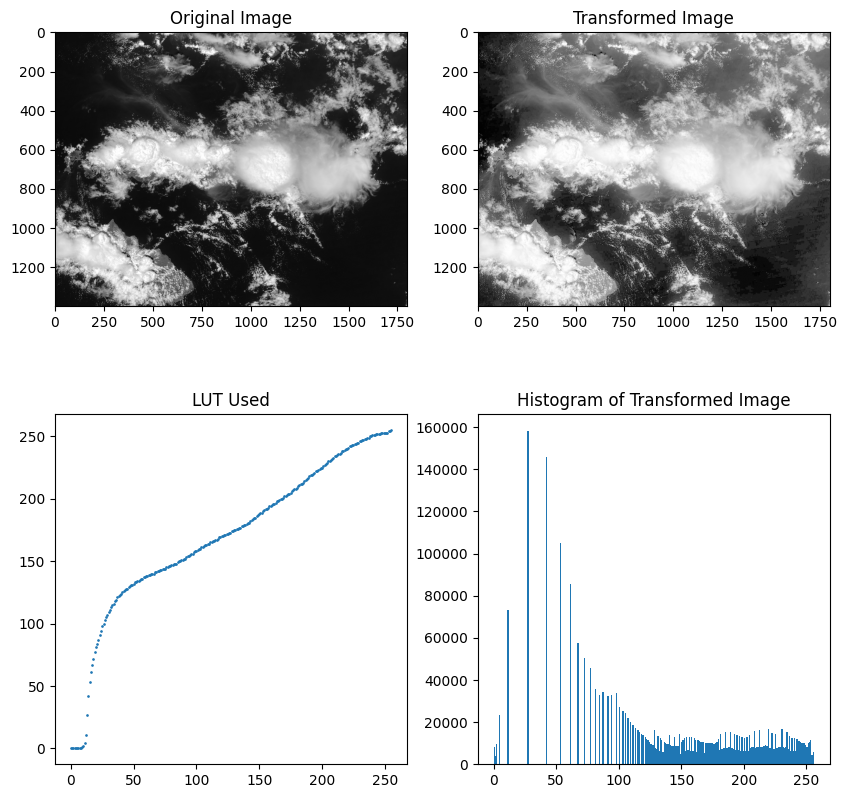

In [29]:
def lut_chart(image, lut):
    """ Applies a LUT to an image and shows the result.

        Args:
            image: Input image to be modified.
            lut: a 256 elements array representing a LUT, where
                indices index input values, and their content the
                output ones.
    """
    
    plt.figure(figsize=(10, 10))
    
    # Show the initial image
    plt.subplot(2,2,1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    
    # Apply LUT
    transformed = lut[image]

    # Show the resultant one
    plt.subplot(2,2,2)
    plt.title("Transformed Image")
    plt.imshow(transformed, cmap='gray')

    # Plot the used LUT
    plt.subplot(2,2,3)
    plt.title("LUT Used")
    plt.scatter(np.arange(0,256,1), lut, s=0.85)

    # And finally, the resultant histogram
    plt.subplot(2,2,4)
    plt.title("Histogram of Transformed Image")
    plt.hist(transformed.ravel(), 256, [0,256])
    
    return transformed


# Histogram
hist, _ = np.histogram(image.ravel(), 256, [0,256])

# CDF
cdf = hist.cumsum()

# Make LUT
lut = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
lut = lut.astype(np.uint8)


transformed=lut_chart(image, lut)


#### Method 2 : Histogram Equalization (equalizeHist)

C:\Users\hp\AppData\Local\Temp\ipykernel_14368\4084966523.py:19: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  axes[1,0].hist(image.ravel(), 256, [0,256])
C:\Users\hp\AppData\Local\Temp\ipykernel_14368\4084966523.py:24: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  axes[1,1].hist(equalized_image.ravel(), 256, [0,256])


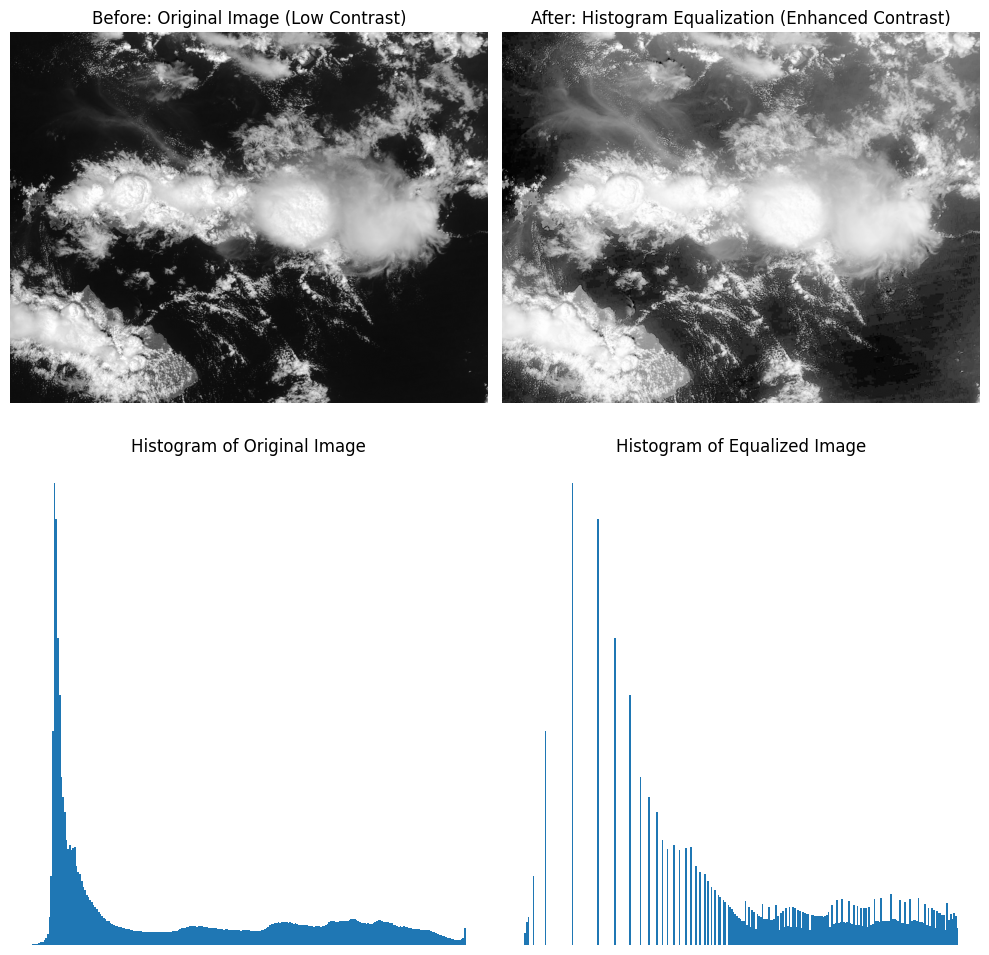


✅ Equalized Image Statistics:
Min pixel value: 0
Max pixel value: 255
Mean pixel value: 129.47


In [30]:
# Apply histogram equalization
# This redistributes pixel values to use the full 0-255 range
equalized_image = cv2.equalizeHist(image)

# Display comparison
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Before: Original image
axes[0,0].imshow(image, cmap='gray')
axes[0,0].set_title("Before: Original Image (Low Contrast)")
axes[0,0].axis("off")

# After: Equalized image
axes[0,1].imshow(equalized_image, cmap='gray')
axes[0,1].set_title("After: Histogram Equalization (Enhanced Contrast)")
axes[0,1].axis("off")

# Show the histogram of the original image
axes[1,0].hist(image.ravel(), 256, [0,256])
axes[1,0].set_title("Histogram of Original Image")
axes[1,0].axis("off")

# Show the histogram of the equalized image
axes[1,1].hist(equalized_image.ravel(), 256, [0,256])
axes[1,1].set_title("Histogram of Equalized Image")
axes[1,1].axis("off")

plt.tight_layout()
plt.show()

print(f"\n✅ Equalized Image Statistics:")
print(f"Min pixel value: {equalized_image.min()}")
print(f"Max pixel value: {equalized_image.max()}")
print(f"Mean pixel value: {equalized_image.mean():.2f}")

### 6.6 Step 5: Apply Otsu's Automatic Thresholding

**What is Otsu's Method?**

Otsu's method is an automatic thresholding technique that finds the optimal threshold value to separate an image into two classes (foreground and background).



🎯 Otsu's Threshold Value: 131.0
Pixels below 131.0 → BLACK (water/land)
Pixels above 131.0 → WHITE (clouds)


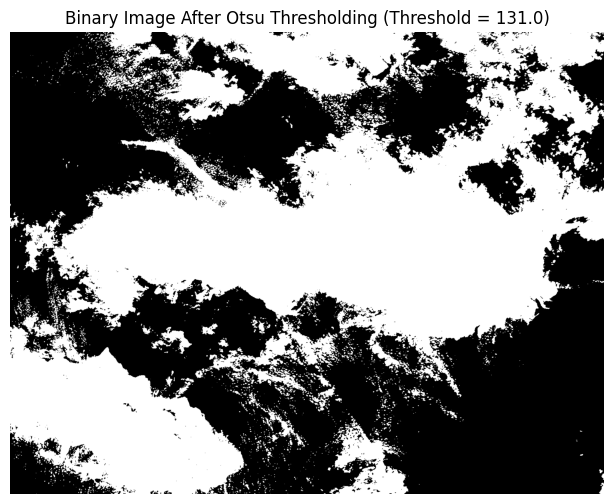

In [33]:
# Apply Otsu's thresholding
# Otsu's method automatically finds the optimal threshold value
# to separate the image into two classes (clouds vs water/land)

# cv2.threshold() returns:
# - threshold_value: The optimal threshold found by Otsu
# - binary_image: The resulting binary image (0 or 255)

threshold_value, binary_image = cv2.threshold(
    equalized_image, # The transformed image gave the same result
    0,  # Initial threshold (ignored when using OTSU)
    255,  # Maximum value
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

print(f"\n🎯 Otsu's Threshold Value: {threshold_value:.1f}")
print(f"Pixels below {threshold_value:.1f} → BLACK (water/land)")
print(f"Pixels above {threshold_value:.1f} → WHITE (clouds)")

# Display the binary result
plt.figure(figsize=(10, 6))
plt.imshow(binary_image, cmap='gray')
plt.title(f"Binary Image After Otsu Thresholding (Threshold = {threshold_value:.1f})")
plt.axis("off")
plt.show()

### 6.7 Step 6: Complete Before/After Comparison

C:\Users\hp\AppData\Local\Temp\ipykernel_14368\985657684.py:10: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  axes[0, 1].hist(image.ravel(), 256, [0, 256], color='darkblue')


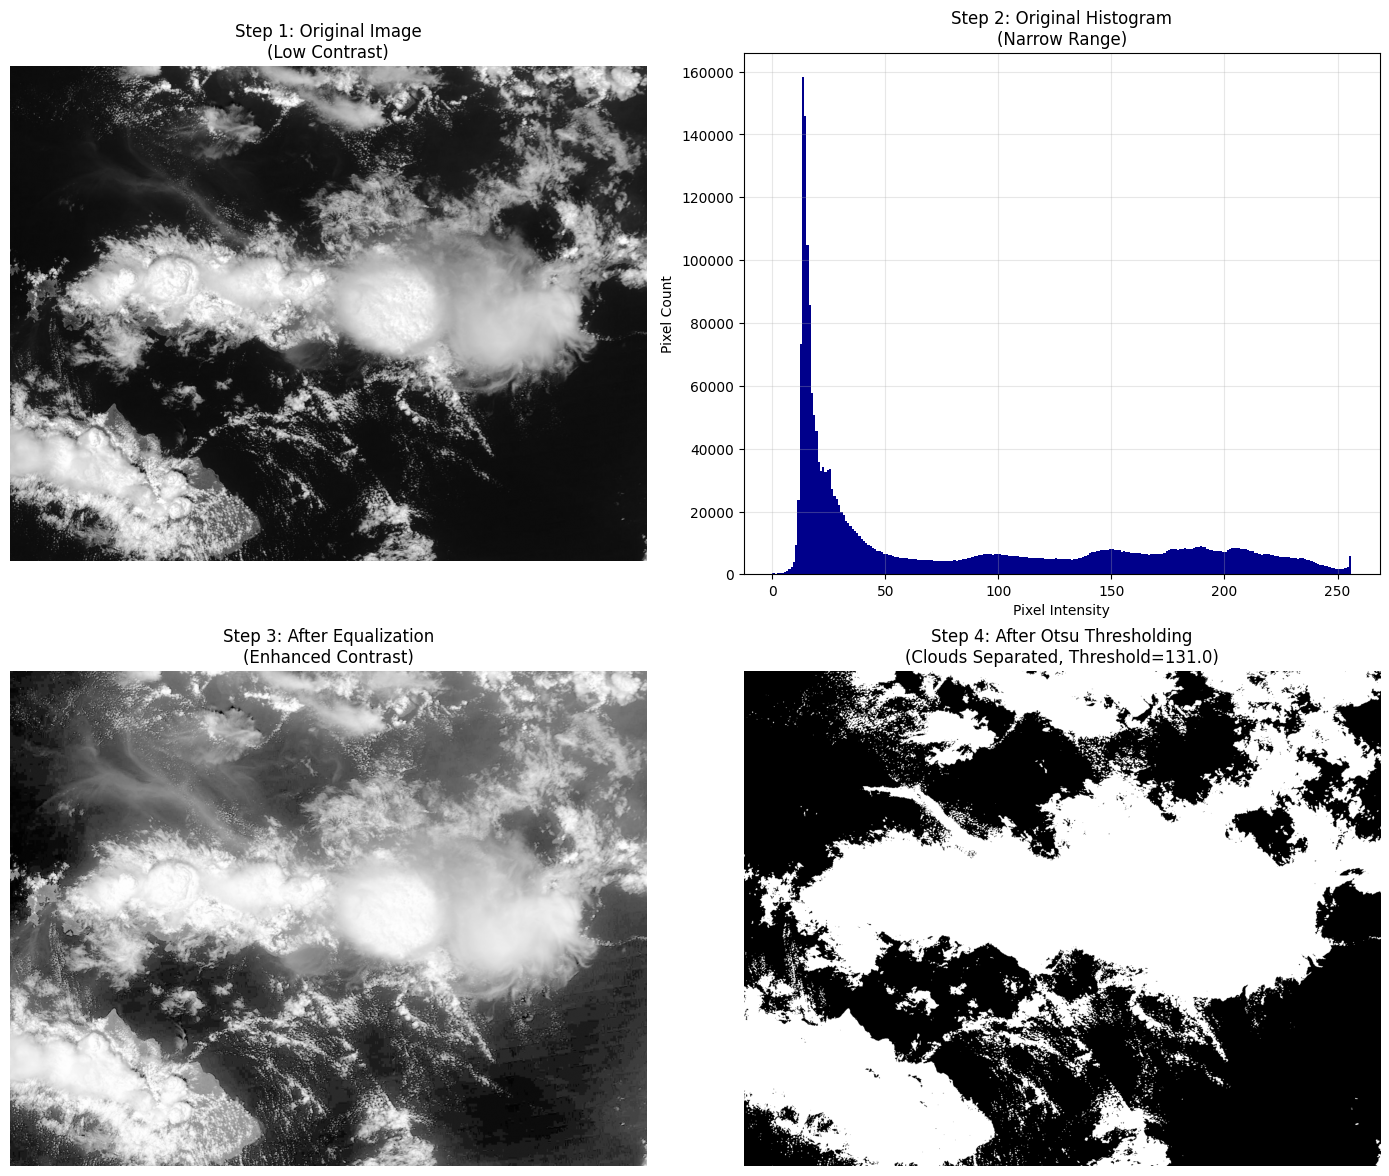

In [35]:
# Create a comprehensive comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Row 1, Col 1: Original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Step 1: Original Image\n(Low Contrast)")
axes[0, 0].axis("off")

# Row 1, Col 2: Original histogram
axes[0, 1].hist(image.ravel(), 256, [0, 256], color='darkblue')
axes[0, 1].set_title("Step 2: Original Histogram\n(Narrow Range)")
axes[0, 1].set_xlabel("Pixel Intensity")
axes[0, 1].set_ylabel("Pixel Count")
axes[0, 1].grid(True, alpha=0.3)

# Row 2, Col 1: Equalized image
axes[1, 0].imshow(equalized_image, cmap='gray')
axes[1, 0].set_title("Step 3: After Equalization\n(Enhanced Contrast)")
axes[1, 0].axis("off")

# Row 2, Col 2: Binary image
axes[1, 1].imshow(binary_image, cmap='gray')
axes[1, 1].set_title(f"Step 4: After Otsu Thresholding\n(Clouds Separated, Threshold={threshold_value:.1f})")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

### 6.8 Bonus: Applying Threshold to Original Image (Without Equalization)

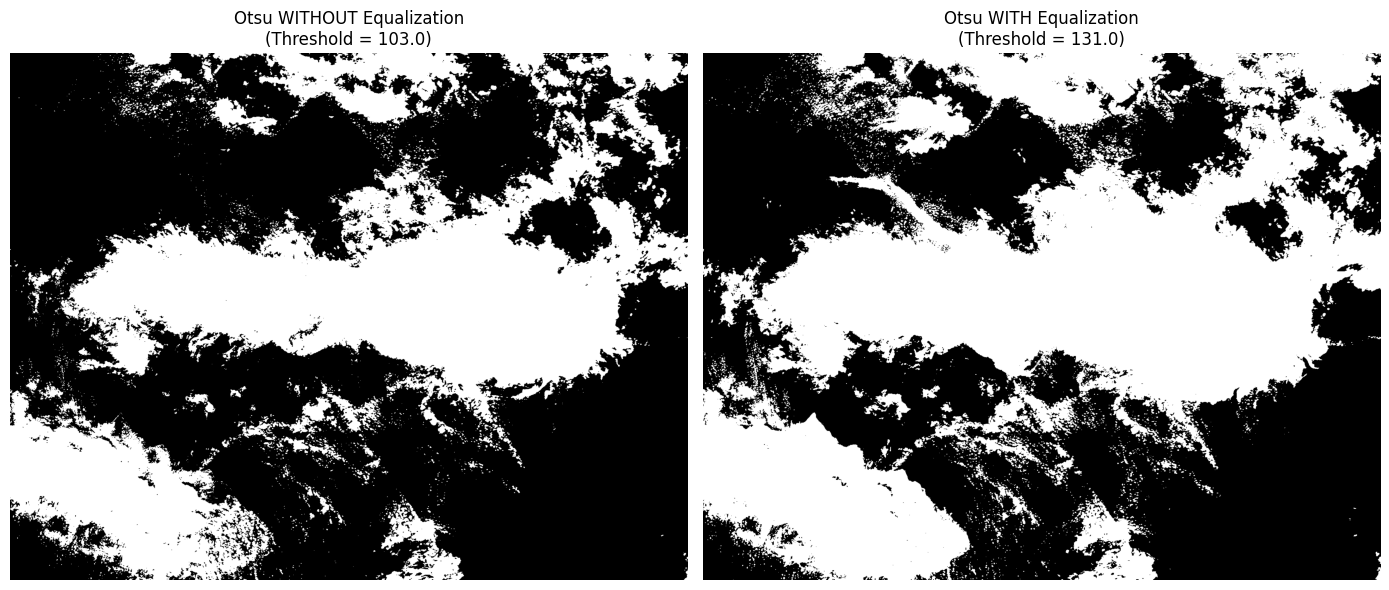


🔍 Comparison:
Threshold on original image: 103.0
Threshold after equalization: 131.0
Difference: 28.0

📊 Conclusion: Equalization significantly improves the separation quality!
The binary mask after equalization shows clearer distinction between clouds and water/land.


In [36]:
# Apply Otsu directly to the original low-contrast image
threshold_value_original, binary_original = cv2.threshold(
    image,
    0,
    255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

# Compare: Thresholding with vs without equalization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Without equalization
axes[0].imshow(binary_original, cmap='gray')
axes[0].set_title(f"Otsu WITHOUT Equalization\n(Threshold = {threshold_value_original:.1f})")
axes[0].axis("off")

# With equalization
axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title(f"Otsu WITH Equalization\n(Threshold = {threshold_value:.1f})")
axes[1].axis("off")

plt.tight_layout()
plt.show()

print("\n🔍 Comparison:")
print(f"Threshold on original image: {threshold_value_original:.1f}")
print(f"Threshold after equalization: {threshold_value:.1f}")
print(f"Difference: {abs(threshold_value - threshold_value_original):.1f}")
print("\n📊 Conclusion: Equalization significantly improves the separation quality!")
print("The binary mask after equalization shows clearer distinction between clouds and water/land.")